In [1]:
#モジュールインポート
import random
import math
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import seaborn as snsimport 
import openpyxl
import math

#関数定義

def toutyakukannkaku(i):
    return -a *math.log(RAND1[i]) 

def sabiszikan(i):
    return -b * math.log(RAND2[i]) 

def id(x):
    return x

def RAND(i):
    return random.random()


def ruisekitoutyaku(i):
    G.append(A[i])
    return sum(G)

def linear(x, a, b,c):
    return a*x**2 + b*x + c
    
def notlinear(x, a, b):
    return a*np.log(x) + b
    
def linear3(x,a,b,c,d):
    return a*x**3 + b*x**2 +c*x +d

def ulog(x,a,b,c): 
    return a*np.log(x + b) + c

def tapioka(x):
    return  param6[0] * x ** 3 + param6[1] * x ** 2 + param6[2] * x   +  param6[3]

def tyuros_integural(x):
    return  1/4 * param3[0] * x ** 4 + 1/3 * param3[1] * x ** 3 + 1/2 * param3[2] * x ** 2   +  param3[3] * x

def tapioka_integural(x):
    return  1/4 * param6[0] * x ** 4 + 1/3 * param6[1] * x ** 3 + 1/2 * param6[2] * x ** 2   +  param6[3] * x

def slog(x,a,b,c,d):
    return a*np.log(b*x + c) + d


def beep(freq, dur=100):
    import winsound
    winsound.Beep(freq, dur)

#試行回数
d = 100


#チュロスの格納値
T1 = []
T2 = []
T3 = []
T4 = []
T5 = []

p=0
result = []
result1 = []
result2 = []
result3 = []
result4 = []
result5 = []
result6 = []
result7 = []
result8 = []
result9 = []
result10 = []
result11 = []

k1 = []
k2 = []


for time in range(1,d+1):
    ID = [id(x) for x in range(1,279)]
    RAND1 = [RAND(i) for i in range(1,279)]
    RAND2 = [RAND(i) for i in range(1,279)]
    data = pd.DataFrame({"ID":ID,"RAND1":RAND1,
                             "RAND2":RAND2})
    #各地の値の確認
    λ = 30.778/60
    a = 1/λ
    μ = 40/60
    b = 1/μ
    #到着時間とサービスにかかる時間を算出
    G = []
    A = [toutyakukannkaku(i) for i in range(0,278)]
    B = [sabiszikan(i) for i in range(0,278)]
    F = [ruisekitoutyaku(i) for i in range(0,278)]
    data["到着間隔"] = A
    data["累積到着"] = F
    data["サービス時間"] = B
    #最初のお客さんの来店時間
    x1 = F[0]
    #最初のお客さんが出ていく時間
    y1 = F[0] + B[0]
    #お客さんの来店時間を収納する列をC、出ていく時間を収納する列をD
    C = []
    D = []
    C.append(x1)
    D.append(y1)
    #Fが累積到着、Bがサービス時間、待ち人数を求めてい
    for i in range(1,278):
        if F[i] < D[i-1]:
            C.append(D[i-1])
            D.append(D[i-1]+ + B[i])
        else:
            C.append(F[i])
            D.append(F[i] + B[i])
    E1 = []
    data["サービス開始"] = C
    data["サービス終了"] = D
    
    for i in range(0,len(data)):
        if data.iloc[i,4] >= data.iloc[i,6]:
            E1.append(1)
        else:
            w = 1
            if i == len(data) - 1:
                E1.append(w)
            else:
                for s in range(1,len(data) - i):
                    if data.iloc[i+s,4] > data.iloc[i,6]:
                         if s ==len(data) - i - 1  :
                            E1.append(w)
                    else:
                        w += 1
                        if s ==len(data) - i - 1  :
                            E1.append(w)
    data["待ち人数"] = E1
    

    y = []
    x = 0
    for t in range(1,10):
        x += data["待ち人数"][data["待ち人数"] == t].count()/len(data)
        y.append(x)
    
    x = pd.Series([i for i in range(1,10)])
    y  = y
    test = pd.DataFrame({"人数":x, "割合":y})
    
    param1, cov = curve_fit(linear, x, y)
    linear_pred = param1[0] * x ** 2  + param1[1] * x +param1[2]
    param2, cov = curve_fit(notlinear, x, y, maxfev=1000)
    notlinear_pred = param2[0] * np.log(x)   +  param2[1]
    param3, cov = curve_fit(linear3, x, y, maxfev=1000)
    linear3_pred = param3[0] * x ** 3 + param3[1] * x ** 2 + param3[2] * x   +  param3[3]
    param_bounds = ((-np.inf,-1,-np.inf ), (np.inf, np.inf, np.inf))
    param10, cov = curve_fit(ulog, x, y,bounds=param_bounds,maxfev=10000)
    ulog_pred = param10[0]*np.log(x+param10[1]) + param10[2]

    T1.append(r2_score(y, notlinear_pred))
    T2.append(r2_score(y, linear_pred))
    T3.append(r2_score(y, linear3_pred))
    T4.append(r2_score(y, ulog_pred))

    if r2_score(y, notlinear_pred) >= 0.999 or r2_score(y, linear_pred) >= 0.999 or r2_score(y, linear3_pred) >= 0.999 or r2_score(y, ulog_pred) >= 0.999:
        r_max = max(r2_score(y, notlinear_pred),r2_score(y, linear_pred),r2_score(y, linear3_pred),r2_score(y, ulog_pred))
        if r_max == r2_score(y, notlinear_pred):
            print("超えた!!",time,"回目のR2値は非線形で",r2_score(y, notlinear_pred))
            name = "notlinear"
            def pred(x):
                return param2[0]*(x*np.log(x) + x)   +  param2[1] * x 
            result11.append(pred(7)-pred(1))
            
            
        elif r_max == r2_score(y, linear_pred):
            print("超えた!!",time,"回目のR2値は線形で",r2_score(y, linear_pred))
            def pred(x):
                1/3 * param1[0] * x ** 3  +  1/2 *param1[1] * x ** 2 + param1[2] * x
            name = "linear"
            result11.append(pred(7)-pred(1))
            
        elif r_max == r2_score(y, ulog_pred):
            print("超えた!!",time,"回目のR2値は対数で",r2_score(y, ulog_pred))
            name = "log"
            def pred(x):
                return param10[0]*x*(np.log(x+param10[1])-1) + param10[2]*x
            result11.append(pred(7)-pred(1))
            
        else:
            print("超えた!!",time,"回目のR2値は三乗式で",r2_score(y, linear3_pred))
            name = "linear3"
            def pred(x):
                return 1/4 * param3[0] * x ** 4 + 1/3 * param3[1] * x ** 3 + 1/2*param3[2] * x ** 2   +  param3[3] * x
            result11.append(pred(7)-pred(1))
        
        result.append(time)
        result1.append(y[0])
        result2.append(y[1])
        result3.append(y[2])
        result4.append(y[3])
        result5.append(y[4])
        result6.append(y[5])
        result7.append(y[6])
        result8.append(max(r2_score(y, notlinear_pred),r2_score(y, linear_pred),r2_score(y, linear3_pred),r2_score(y, ulog_pred)))
        result9.append(name)
        result10.append(sum(data["待ち人数"])/len(data))
        k1.append(data)
        p += 1
    
    else:
        print(time,"回目はなし")
dt = pd.DataFrame({"回数":result,"一人":result1,"二人":result2,"三人":result3,
                   "四人":result4,"五人":result5,"六人":result6,"七人":result7,
                  "R2値":result8,"モデル":result9,"平均値":result10,"S":result11})

超えた!! 1 回目のR2値は三乗式で 0.9996462382663951
2 回目はなし
3 回目はなし
4 回目はなし
5 回目はなし
6 回目はなし
7 回目はなし
8 回目はなし
9 回目はなし
超えた!! 10 回目のR2値は三乗式で 0.999079957659895
11 回目はなし
超えた!! 12 回目のR2値は三乗式で 0.9994877114391035
13 回目はなし
超えた!! 14 回目のR2値は三乗式で 0.9998650722156555
超えた!! 15 回目のR2値は三乗式で 0.9992453531509757
16 回目はなし
17 回目はなし
超えた!! 18 回目のR2値は三乗式で 0.9992228974835787
超えた!! 19 回目のR2値は三乗式で 0.9995196287867277
20 回目はなし
超えた!! 21 回目のR2値は三乗式で 0.9991341051969469
22 回目はなし
23 回目はなし
24 回目はなし
25 回目はなし
26 回目はなし
27 回目はなし
28 回目はなし
29 回目はなし
超えた!! 30 回目のR2値は三乗式で 0.9993423228468267
31 回目はなし
32 回目はなし
33 回目はなし
超えた!! 34 回目のR2値は三乗式で 0.9994232157798226
超えた!! 35 回目のR2値は三乗式で 0.9998822421102214
36 回目はなし
37 回目はなし
超えた!! 38 回目のR2値は三乗式で 0.9992239376955211
39 回目はなし
超えた!! 40 回目のR2値は三乗式で 0.9996733918321716
41 回目はなし
42 回目はなし
43 回目はなし
超えた!! 44 回目のR2値は三乗式で 0.9998153507808669
超えた!! 45 回目のR2値は三乗式で 0.999295486205791
46 回目はなし
47 回目はなし
48 回目はなし
49 回目はなし
50 回目はなし
51 回目はなし
52 回目はなし
超えた!! 53 回目のR2値は三乗式で 0.9992456301430843
超えた!! 54 回目のR2値は三乗式で 0.999154800678154

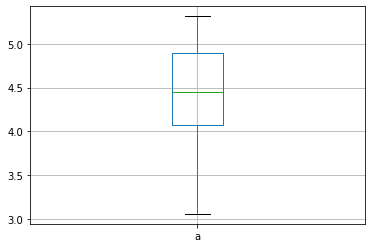

In [7]:
a = pd.DataFrame({"a":dt["S"]})
a.boxplot()

In [8]:
#チュロスの格納値
T1 = []
T2 = []
T3 = []
T4 = []
T5 = []

p=0
result_t = []
result1_t = []
result2_t = []
result3_t = []
result4_t = []
result5_t = []
result6_t = []
result7_t = []
result8_t = []
result9_t = []
result10_t = []
result11_t = []

k1 = []
k2 = []


for time in range(1,d+1):
    ID = [id(x) for x in range(1,279)]
    RAND1 = [RAND(i) for i in range(1,279)]
    RAND2 = [RAND(i) for i in range(1,279)]
    data = pd.DataFrame({"ID":ID,"RAND1":RAND1,
                             "RAND2":RAND2})
    #各地の値の確認
    λ = 36/60
    a = 1/λ
    μ = 60/60
    b = 1/μ
    #到着時間とサービスにかかる時間を算出
    G = []
    A = [toutyakukannkaku(i) for i in range(0,278)]
    B = [sabiszikan(i) for i in range(0,278)]
    F = [ruisekitoutyaku(i) for i in range(0,278)]
    data["到着間隔"] = A
    data["累積到着"] = F
    data["サービス時間"] = B
    #最初のお客さんの来店時間
    x1 = F[0]
    #最初のお客さんが出ていく時間
    y1 = F[0] + B[0]
    #お客さんの来店時間を収納する列をC、出ていく時間を収納する列をD
    C = []
    D = []
    C.append(x1)
    D.append(y1)
    #Fが累積到着、Bがサービス時間、待ち人数を求めてい
    for i in range(1,278):
        if F[i] < D[i-1]:
            C.append(D[i-1])
            D.append(D[i-1]+ + B[i])
        else:
            C.append(F[i])
            D.append(F[i] + B[i])
    E1 = []
    data["サービス開始"] = C
    data["サービス終了"] = D
    
    for i in range(0,len(data)):
        if data.iloc[i,4] >= data.iloc[i,6]:
            E1.append(1)
        else:
            w = 1
            if i == len(data) - 1:
                E1.append(w)
            else:
                for s in range(1,len(data) - i):
                    if data.iloc[i+s,4] > data.iloc[i,6]:
                         if s ==len(data) - i - 1  :
                            E1.append(w)
                    else:
                        w += 1
                        if s ==len(data) - i - 1  :
                            E1.append(w)
    data["待ち人数"] = E1
    

    y = []
    x = 0
    for t in range(1,10):
        x += data["待ち人数"][data["待ち人数"] == t].count()/len(data)
        y.append(x)
    
    x = pd.Series([i for i in range(1,10)])
    y  = y
    test = pd.DataFrame({"人数":x, "割合":y})
    
    param1, cov = curve_fit(linear, x, y)
    linear_pred = param1[0] * x ** 2  + param1[1] * x +param1[2]
    param2, cov = curve_fit(notlinear, x, y, maxfev=1000)
    notlinear_pred = param2[0] * np.log(x)   +  param2[1]
    param3, cov = curve_fit(linear3, x, y, maxfev=1000)
    linear3_pred = param3[0] * x ** 3 + param3[1] * x ** 2 + param3[2] * x   +  param3[3]
    param_bounds = ((-np.inf,-1,-np.inf ), (np.inf, np.inf, np.inf))
    param10, cov = curve_fit(ulog, x, y,bounds=param_bounds,maxfev=10000)
    ulog_pred = param10[0]*np.log(x+param10[1]) + param10[2]

    T1.append(r2_score(y, notlinear_pred))
    T2.append(r2_score(y, linear_pred))
    T3.append(r2_score(y, linear3_pred))
    T4.append(r2_score(y, ulog_pred))

    if r2_score(y, notlinear_pred) >= 0.999 or r2_score(y, linear_pred) >= 0.999 or r2_score(y, linear3_pred) >= 0.999 or r2_score(y, ulog_pred) >= 0.999:
        r_max = max(r2_score(y, notlinear_pred),r2_score(y, linear_pred),r2_score(y, linear3_pred),r2_score(y, ulog_pred))
        if r_max == r2_score(y, notlinear_pred):
            print("超えた!!",time,"回目のR2値は非線形で",r2_score(y, notlinear_pred))
            name = "notlinear"
            def pred(x):
                return param2[0]*(x*np.log(x) + x)   +  param2[1] * x 
            result11_t.append(pred(7)-pred(1))
            
            
        elif r_max == r2_score(y, linear_pred):
            print("超えた!!",time,"回目のR2値は線形で",r2_score(y, linear_pred))
            def pred(x):
                1/3 * param1[0] * x ** 3  +  1/2 *param1[1] * x ** 2 + param1[2] * x
            name = "linear"
            result11_t.append(pred(7)-pred(1))
            
        elif r_max == r2_score(y, ulog_pred):
            print("超えた!!",time,"回目のR2値は対数で",r2_score(y, ulog_pred))
            name = "log"
            def pred(x):
                return param10[0]*x*(np.log(x+param10[1])-1) + param10[2]*x
            result11_t.append(pred(7)-pred(1))
            
        else:
            print("超えた!!",time,"回目のR2値は三乗式で",r2_score(y, linear3_pred))
            name = "linear3"
            def pred(x):
                return 1/4 * param3[0] * x ** 4 + 1/3 * param3[1] * x ** 3 + 1/2*param3[2] * x ** 2   +  param3[3] * x
            result11_t.append(pred(7)-pred(1))
        
        result_t.append(time)
        result1_t.append(y[0])
        result2_t.append(y[1])
        result3_t.append(y[2])
        result4_t.append(y[3])
        result5_t.append(y[4])
        result6_t.append(y[5])
        result7_t.append(y[6])
        result8_t.append(max(r2_score(y, notlinear_pred),r2_score(y, linear_pred),r2_score(y, linear3_pred),r2_score(y, ulog_pred)))
        result9_t.append(name)
        result10_t.append(sum(data["待ち人数"])/len(data))
        k1.append(data)
        p += 1
        
    else:
        print(time,"回目はなし")
result_data_t = pd.DataFrame({"指数関数型モデル":T1,"二次関数型モデル":T2,"三次関数型モデル":T3,"対数関数型モデル":T4})
result_data_t.to_csv("resultdata_tapioka.csv")
dt_tt = pd.DataFrame({"回数":result_t,"一人":result1_t,"二人":result2_t,"三人":result3_t,
                   "四人":result4_t,"五人":result5_t,"六人":result6_t,"七人":result7_t,
                  "R2値":result8_t,"モデル":result9_t,"pred":result11_t})

1 回目はなし
2 回目はなし
3 回目はなし
4 回目はなし
5 回目はなし
超えた!! 6 回目のR2値は三乗式で 0.999159376297034
7 回目はなし
8 回目はなし
9 回目はなし
10 回目はなし
11 回目はなし
12 回目はなし
13 回目はなし
14 回目はなし
15 回目はなし
超えた!! 16 回目のR2値は三乗式で 0.9996554783340162
超えた!! 17 回目のR2値は三乗式で 0.9998400630909465
超えた!! 18 回目のR2値は三乗式で 0.9997292184628689
19 回目はなし
20 回目はなし
超えた!! 21 回目のR2値は三乗式で 0.9994143906416929
22 回目はなし
超えた!! 23 回目のR2値は三乗式で 0.9993994236707897
24 回目はなし
25 回目はなし
26 回目はなし
超えた!! 27 回目のR2値は対数で 0.9991534555796655
28 回目はなし
超えた!! 29 回目のR2値は三乗式で 0.9991786211380224
30 回目はなし
31 回目はなし
32 回目はなし
33 回目はなし
超えた!! 34 回目のR2値は三乗式で 0.9994740914945106
35 回目はなし
36 回目はなし
37 回目はなし
38 回目はなし
39 回目はなし
超えた!! 40 回目のR2値は三乗式で 0.9991218416749774
41 回目はなし
42 回目はなし
43 回目はなし
44 回目はなし
45 回目はなし
46 回目はなし
47 回目はなし
48 回目はなし
49 回目はなし
50 回目はなし
超えた!! 51 回目のR2値は三乗式で 0.9992838716928071
超えた!! 52 回目のR2値は三乗式で 0.9990046003455374
53 回目はなし
54 回目はなし
55 回目はなし
56 回目はなし
57 回目はなし
58 回目はなし
超えた!! 59 回目のR2値は三乗式で 0.9994334698105004
超えた!! 60 回目のR2値は三乗式で 0.9998785271483269
61 回目はなし
62 回目はなし
63 回目はなし
64 回目はなし
6

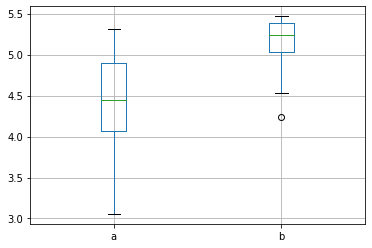

In [10]:
a = pd.DataFrame({"a":dt["S"],"b":dt_tt["pred"]})
a.boxplot()

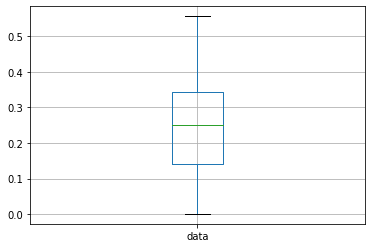

In [11]:
X = []
for i in range(len(dt)):
    for s in range(len(dt_tt)):
        X.append(1/dt.iloc[i,10]*abs(dt_tt.iloc[s,10]-dt.iloc[i,11]))
data=pd.DataFrame({"data":X})
data.boxplot()

In [16]:
data[data["data"]<0.1].count()

data    125
dtype: int64

In [17]:
data.count()

data    735
dtype: int64

In [18]:
125/735

0.17006802721088435